In [1]:
# Global setting for saving figures bellow to .pdf files
save=False
title=True
legend=True

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# Visualization of module 'non-informative'

In [2]:
# Load the data from a csv file
import noninformative.utils as nu
df = nu.load_csv()

In [3]:
# Config of the visualization
sensitivity_min = 0.0 # Less then this will be masked
specificity_min = 0.0 # Less then this will be masked

In [4]:
from ipywidgets import Dropdown, IntSlider, VBox
base_se = Dropdown(options=df['base_se'].unique(), description='Base Se:')
base_sp = Dropdown(options=df['base_sp'].unique(), description='Base Sp:')
max_group_size = IntSlider(value=20, min=3, max=df['group'].max(), description='Max k:')
display(VBox([max_group_size, base_se, base_sp]))

In [5]:
# Filter
df_filt = df.loc[df['group'] <= max_group_size.value]
df_filt = df_filt.loc[df_filt['base_se'] == base_se.value]
df_filt = df_filt.loc[df_filt['base_sp'] == base_sp.value]
df_filt

algo alpha  seed      prob  group   value     pse     psp  base_se  \
4       A2   nan     1  0.200000     14  0.8911  0.7290  0.9267      0.9   
7       D2   nan     1  0.003663     10  0.2288  0.8100  0.9874      0.9   
55      A2   nan     1  0.100350     18  0.7223  0.7290  0.9411      0.9   
68      D2   nan     1  0.004205      9  0.2409  0.8100  0.9873      0.9   
107     D2   nan     1  0.022008      3  0.4850  0.8100  0.9865      0.9   
...    ...   ...   ...       ...    ...     ...     ...     ...      ...   
30685   A2   nan     1  0.132228      8  0.6734  0.7291  0.9636      0.9   
30692   D3   nan     1  0.016703      4  0.3641  0.7493  0.9937      0.9   
30696   A2   nan     1  0.007301      3  0.8252  0.8552  0.9847      0.9   
30745   D3   nan     1  0.076157     20  0.5031  0.7290  0.9775      0.9   
30753   D2   nan     1  0.006360      5  0.3251  0.8100  0.9880      0.9   

       base_sp     ppv     npv           stage2  
4          0.9  0.7132  0.9319              NaN  
7          0.9  0.1912  0.9993              NaN  
55         0.9  0.5799  0.9689              NaN  
68         0.9  0.2128  0.9992              NaN  
107        0.9  0.5748  0.9957              NaN  
...        ...     ...     ...              ...  
30685      0.9  0.7530  0.9589              NaN  
30692      0.9  0.6682  0.9957           [3, 1]  
30696      0.9  0.2917  0.9989              NaN  
30745      0.9  0.7280  0.9777  [4, 4, 4, 4, 4]  
30753      0.9  0.3014  0.9988              NaN  

[1620 rows x 13 columns]

In [6]:
# Depending on how many rows there are in the df, this may take a while
plot_data = nu.get_plot_data(df_filt)

Building the data for plotting.
Finished.


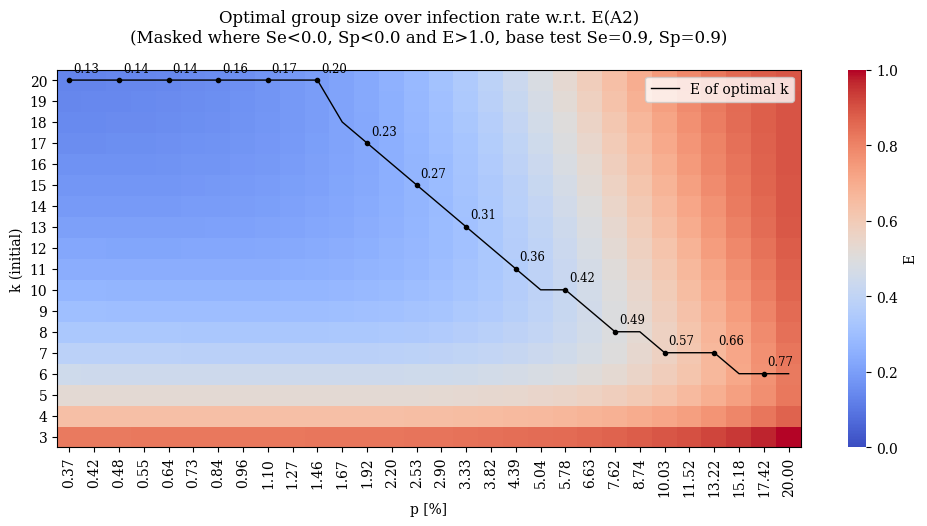

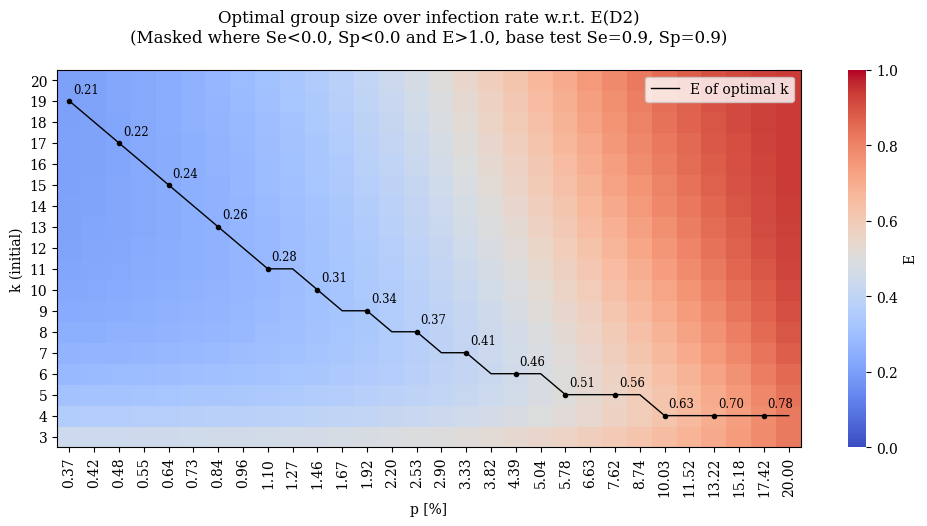

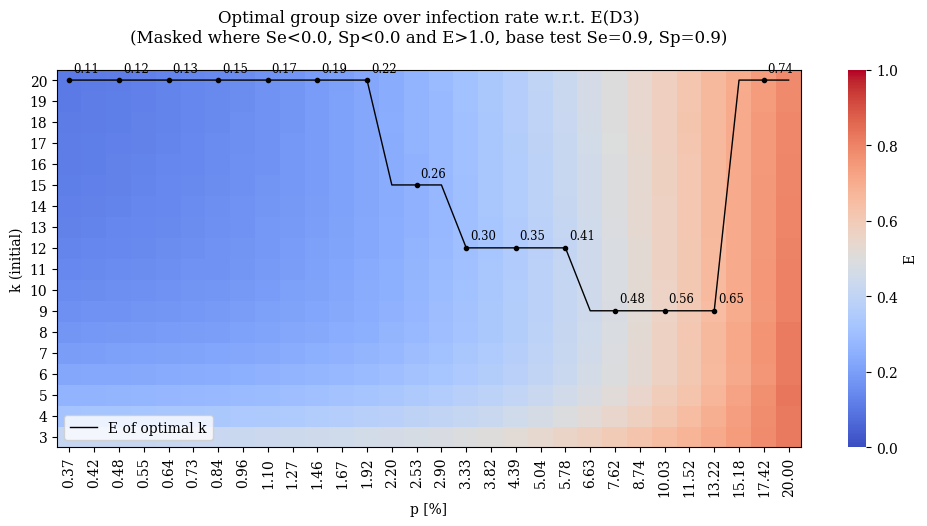

In [7]:
# This will produce one plot per algorithm showing the estimated number of tests per person 
# for any given pair of p and k. It also includes information about sensitivity and specificity 
# if sensitivity_min and/or specificity_min are configured. All points which would results
# in sensitivity or specificity smaller than specified min are going to be masked.
# Also all points with E > 1 are masked automatically.
nu.plot_ets_masked(*plot_data, base_se.value, base_sp.value, sensitivity_min, specificity_min,
                   figsize=(12, min(max(5, 0.25*max_group_size.value), 8)), dpi=100,
                   title=title, show=True, save=save)

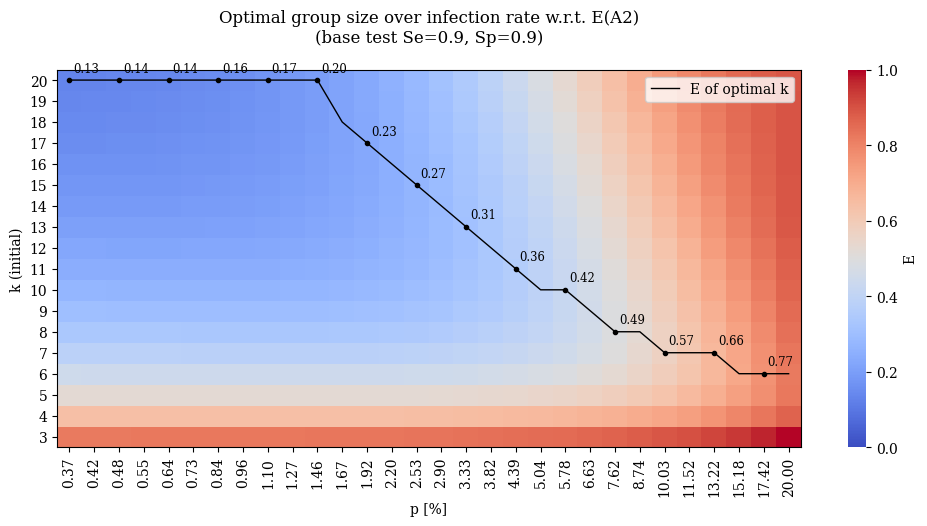

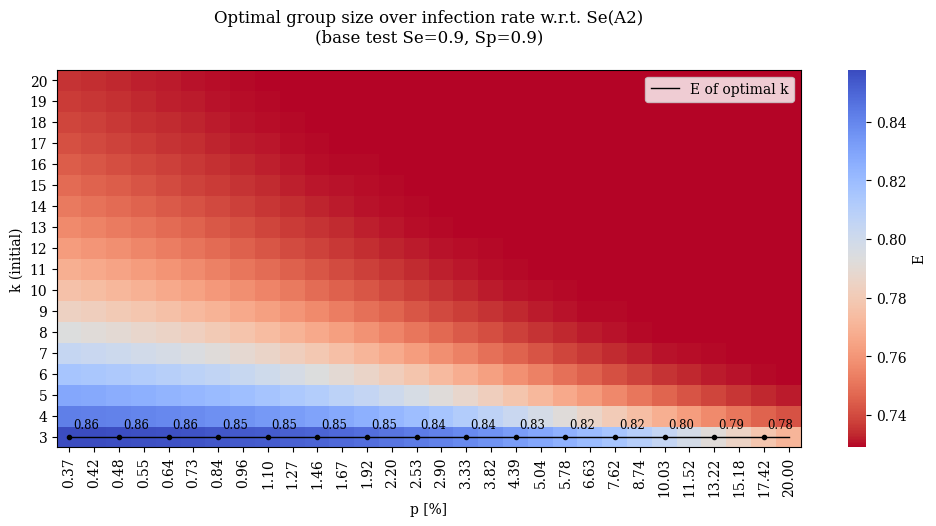

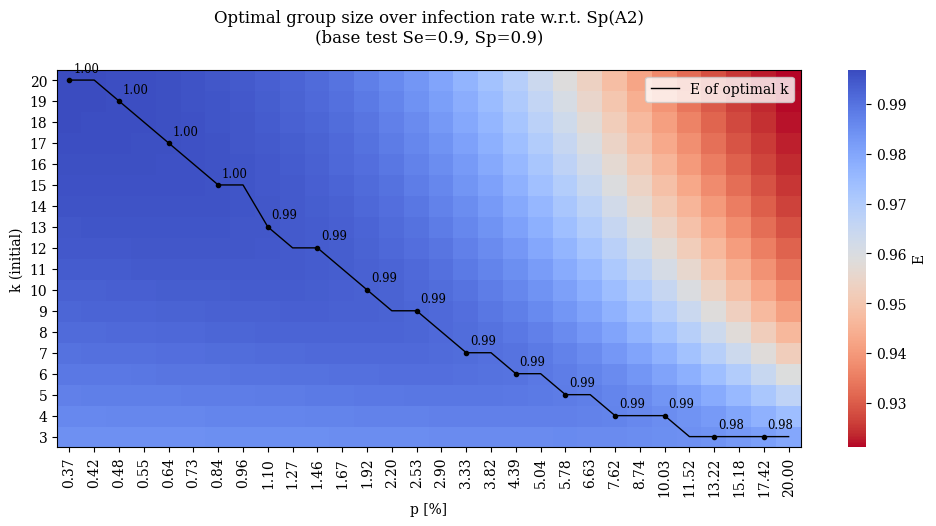

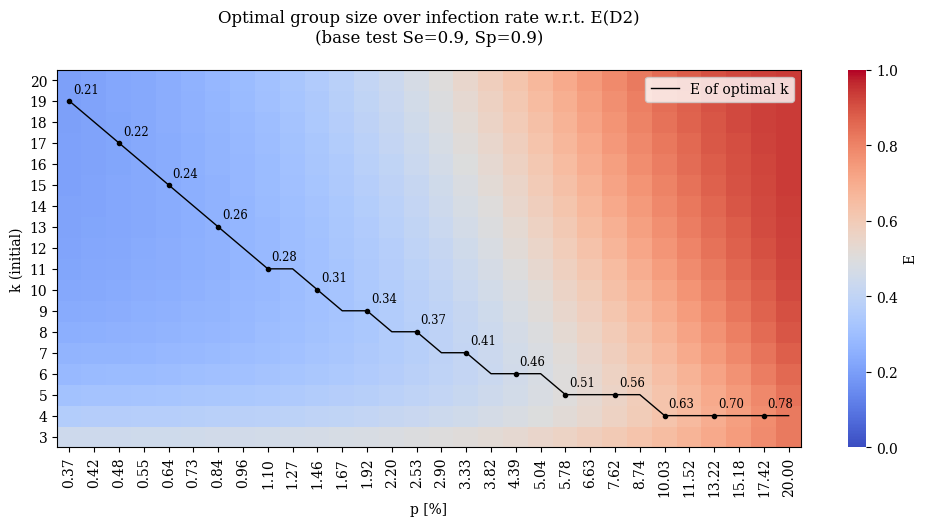

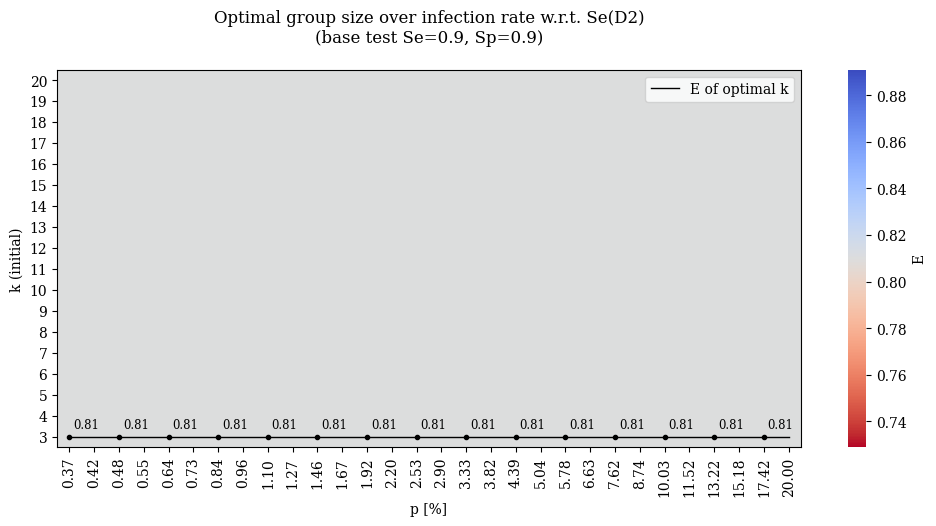

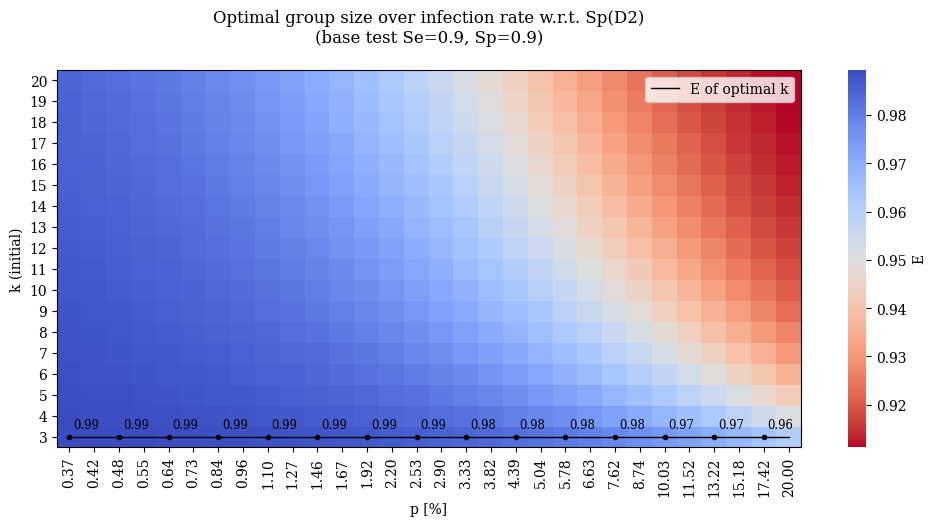

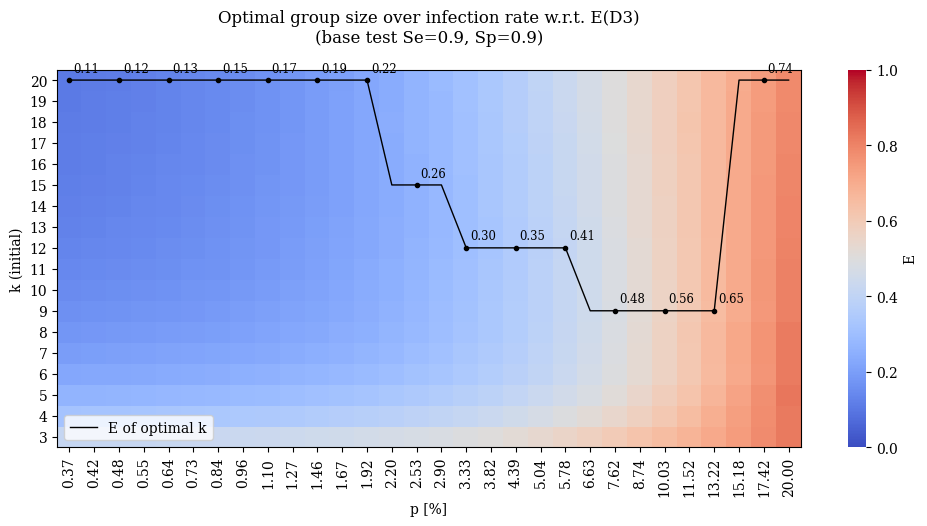

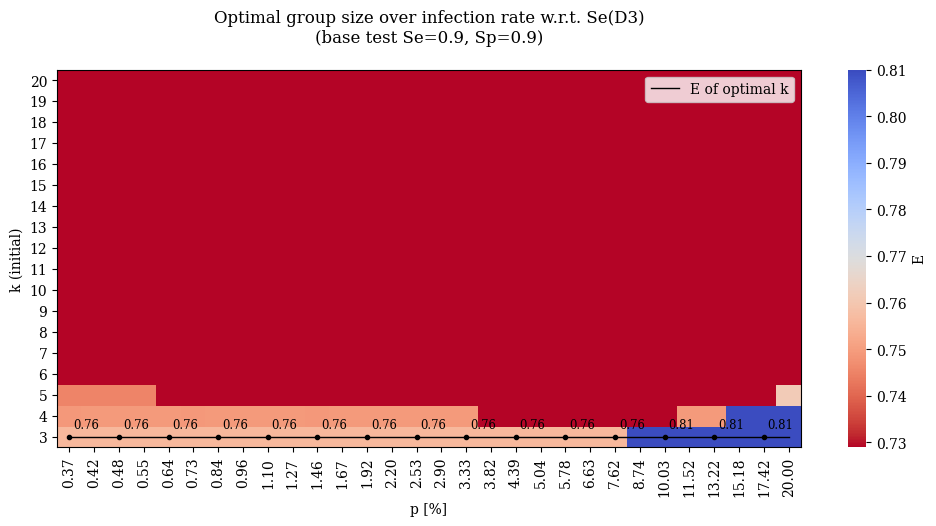

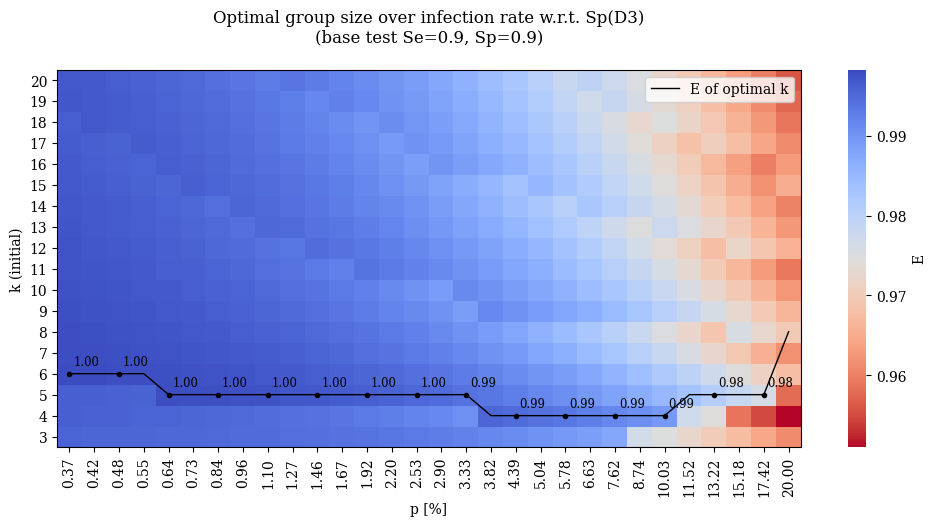

In [8]:
# Plotting the optimal group size over infection rate
# This will produce 3 plots per algorithm, because E, Sensitivity and Specificity are 
# plotted separately. This can be helpful to investigate the gradients on Se and Sp.
nu.plot_ets_pse_psp(*plot_data, base_se.value, base_sp.value, show=True, save=save, title=title,
                    figsize=(12, min(max(5, 0.25*max_group_size.value), 8)), dpi=100)

# Visualization of module 'combined'

In [9]:
# Load the data from a csv file
import combined.utils as cu
df = cu.load_csv()

In [10]:
from ipywidgets import Dropdown, IntSlider, VBox
base_se = Dropdown(options=df['base_se'].unique(), description='Base Se:')
base_sp = Dropdown(options=df['base_sp'].unique(), description='Base Sp:')
max_group_size = IntSlider(value=10, 
                           min=df['group_size'].unique().min(), 
                           max=df['group_size'].unique().max(), 
                           description='Max k:')
VBox([base_se, base_sp, max_group_size])

In [11]:
# Filter the data based on user input
df_filt = df.loc[df['base_se'] == base_se.value]
df_filt = df_filt.loc[df_filt['base_sp'] == base_sp.value]
df_filt = df_filt.drop(['base_se', 'base_sp'], axis=1)
df_filt = df_filt.loc[df_filt['group_size'] <= max_group_size.value]
df_filt

algo  group_size  high_p_elems  high_p   low_p    E(T)      se      sp  \
285     ID3           3             0    0.20  0.0085  0.3939  0.8724  0.9986   
286     ID3           3             1    0.20  0.0085  0.5125  0.8990  0.9984   
287     ID3           3             3    0.20  0.0085  0.8225  0.9025  0.9813   
423     ID2           7             0    0.15  0.0010  0.1991  0.9025  0.9972   
424     ID2           7             1    0.15  0.0010  0.3332  0.9482  0.9914   
...     ...         ...           ...     ...     ...     ...     ...     ...   
153637  ID2           8             1    0.20  0.0500  0.5211  0.9025  0.9890   
153638  ID2           8             8    0.20  0.0500  0.9240  0.9025  0.9619   
153780  IA2           4             0    0.25  0.0321  0.6029  0.9108  0.9963   
153781  IA2           4             1    0.25  0.0321  0.6549  0.8927  0.9960   
153782  IA2           4             4    0.25  0.0321  0.9740  0.8608  0.9835   

        type  
285      LOW  
286      MIX  
287     HIGH  
423      LOW  
424      MIX  
...      ...  
153637   MIX  
153638  HIGH  
153780   LOW  
153781   MIX  
153782  HIGH  

[3600 rows x 9 columns]

In [12]:
# Depending on how many rows there are in the df, this may take a while
optimal_df = cu.get_plot_data(df_filt)

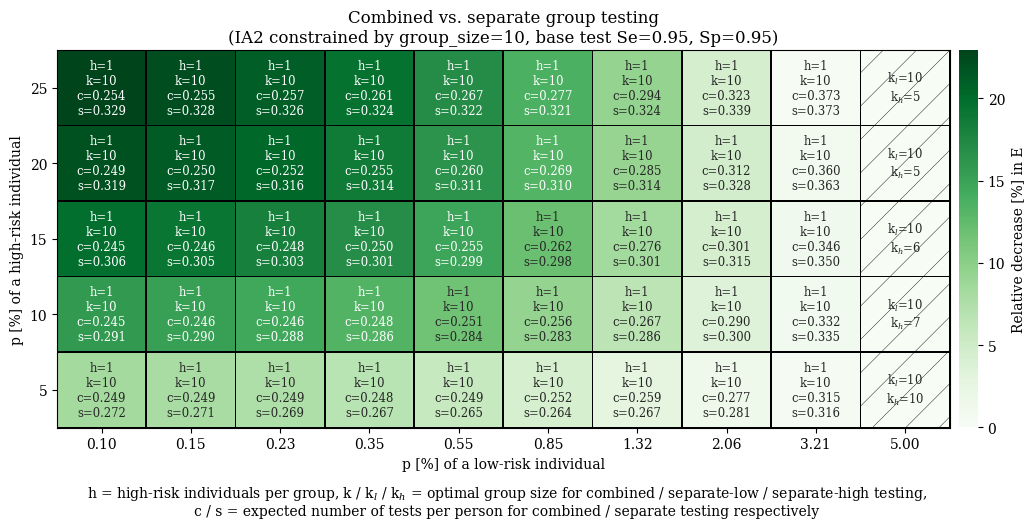

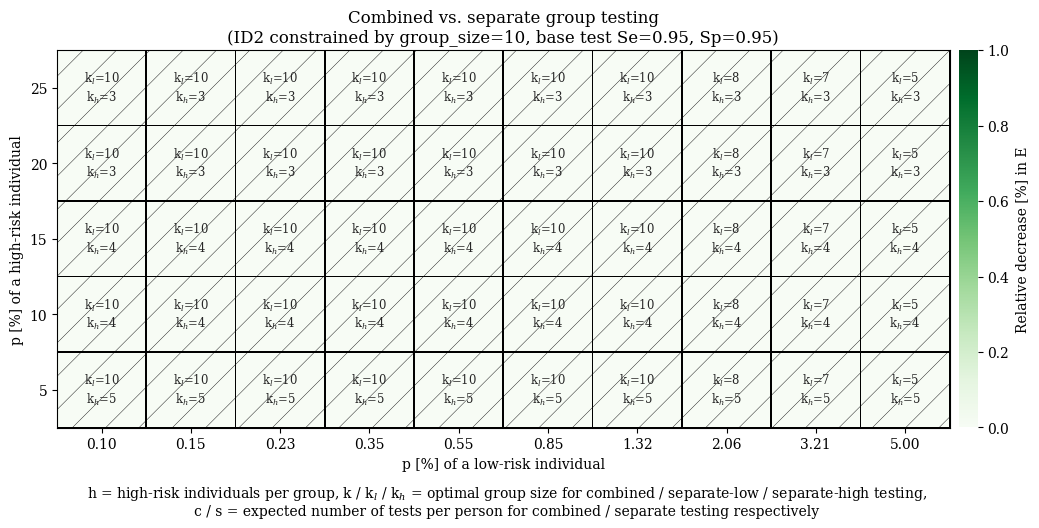

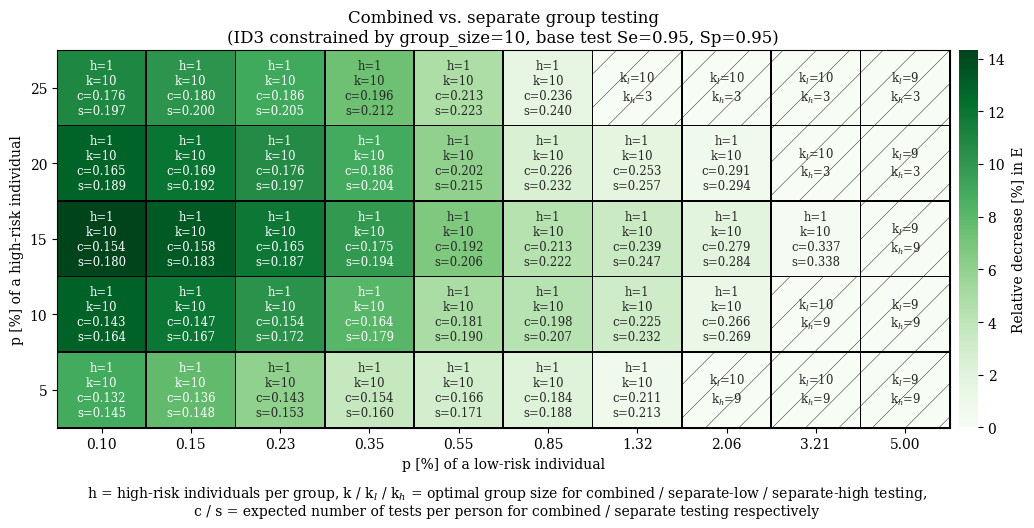

In [13]:
# This produces one plot per algorithm comparing combined approach to informative testing
# with a baseline (separate testing of high-risk individuals and group testing of the low-risk
# individuals or group testing of both groups if it is still beneficial) of the same method.
# Squares which are crossed-out yield no improvement over the baseline or perform worse.
# The darkest green color denotes the highest improvement over the baseline using the current 
# method. However, it is still important to compare the absolute values of c and s especially
# when comparing inbetween the algorithms.
cu.plot_combi_vs_sep(optimal_df, max_group_size.value, base_se.value, base_sp.value, 
                     title=title, legend=legend, show=True, save=save, dpi=100, figsize=(12,5))

# Visalization of module 'nonadaptive'

In [14]:
# Load the data from a csv file
from ipywidgets import Dropdown, FloatSlider, IntSlider, VBox
import nonadaptive.utils as nau
df = nau.load_csv()

In [15]:
# Metric to analyse
metric = Dropdown(options=df.columns[3:-2], description='Metric:')
# Masking
threshold_type = Dropdown(value='PPV', options=df.columns[3:-2], description='Mask by:')
threshold_value = FloatSlider(value=0.99, min=0., max=1., step=0.005, description='Threshold:',
                              continuous_update=False, readout_format='.3f')
base_se = Dropdown(options=df['base_Se'].unique(), description='Base Se:',
                           description_tooltip='Sensitivity of the base test')
base_sp = Dropdown(options=df['base_Sp'].unique(), description='Base Sp:',
                           description_tooltip='Specificity of the base test')
gs = IntSlider(min=df['k'].min(), max=df['k'].max(), value=20, 
                       description='Max k:', continuous_update=False,
                       description_tooltip='Maximal group size')
VBox([gs, base_se, base_sp, metric, threshold_type, threshold_value])

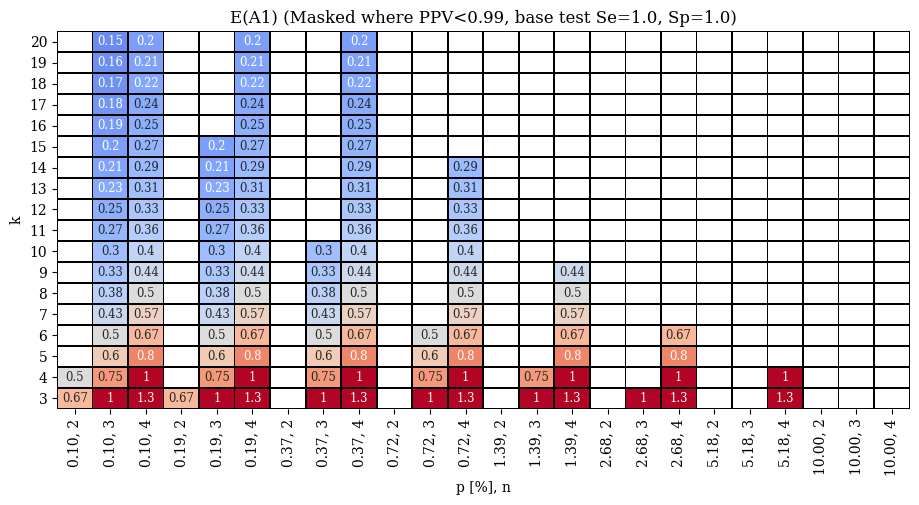

In [16]:
df_filt = df.loc[df['base_Se'] == base_se.value]
df_filt = df_filt.loc[df_filt['base_Sp'] == base_sp.value]
df_filt = df_filt.loc[df_filt['k'] <= gs.value]
height = min(max(5, 0.25*gs.value), 8)
nau.plot(df_filt, metric.value, threshold_type.value, threshold_value.value,
         fig=None, ax=None, figsize=(11, height), dpi=100, show=True, save=save, title=title)